In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pylab.rcParams['figure.figsize'] = (8.0, 8.0)
pylab.rcParams.update({'font.size': 20})

In [3]:
import pandas as pd
sys.path.insert(1, "/Users/rafa/PycharmProjects/NearestNeighbors/")
from NearestNeighborsModule.metrics import mape, mae
from sklearn.preprocessing import MinMaxScaler
from NearestNeighborsModule.DelayVectorDB import convert_dates

In [4]:
from NearestNeighborsModule.forecasting_methods import ForecastingMethods

In [5]:
np.set_printoptions(suppress=True)
file_path = '/Users/rafa/Dropbox/CENACE_forecasting/DEMANDA_NETA_SIN.csv'

df_all = pd.read_csv(file_path, index_col='FECHA')
idx_sub_sampling = [i for i in range(0, df_all.__len__(), 15)]

dict_params = {'DEMANDA_CEL': [6, 4, 0.34100608],
               'DEMANDA_NES': [8, 1, 0.14140621],
               'DEMANDA_NOR': [2, 46, 0.05696183],
               'DEMANDA_NTE': [2, 4, 0.05038196],
               'DEMANDA_OCC': [13, 31, 0.34437311],
               'DEMANDA_ORI': [2, 6, 0.06026154],
               'DEMANDA_PEN': [1, 22, 0.02691927]}

In [6]:
demanda_neta = df_all['DEMANDA_NETA_SIN'][idx_sub_sampling]

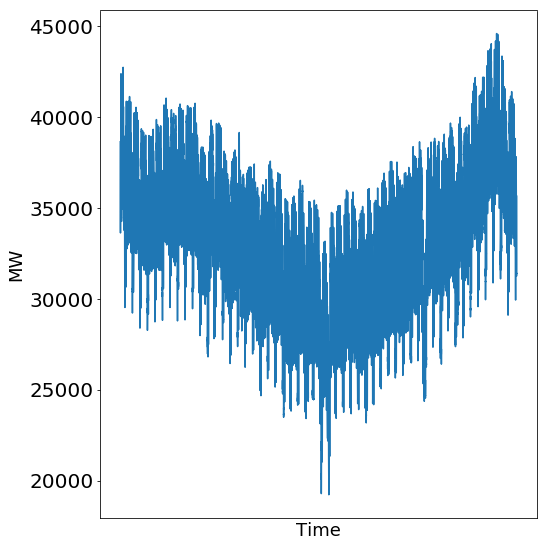

In [12]:
temp_dem = demanda_neta.values
plot(temp_dem)
plt.xlabel('Time', fontsize=18)
plt.ylabel('MW', fontsize=18)
plt.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False) # labels along the bottom edge are off
plt.tight_layout()
savefig('/Users/rafa/Dropbox/My papers/Tesis/figures/chapter7/plot_demanda_neta.eps', dpi=300, format='eps')

In [8]:
from statsmodels.tsa.stattools import adfuller

In [11]:
for name_time_series in ['DEMANDA_CEL', 'DEMANDA_NES', 'DEMANDA_NOR', 'DEMANDA_NTE', 'DEMANDA_OCC', 'DEMANDA_ORI', 'DEMANDA_PEN', 'DEMANDA_NETA_SIN']:
    print(name_time_series)
    df = df_all[name_time_series][idx_sub_sampling]
    df = df[:df.index.get_loc('2018-06-23 00:00:00')]
    result = adfuller(df.values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

DEMANDA_CEL
ADF Statistic: -24.430219
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
DEMANDA_NES
ADF Statistic: -7.562009
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
DEMANDA_NOR
ADF Statistic: -5.516391
p-value: 0.000002
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
DEMANDA_NTE
ADF Statistic: -6.467922
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
DEMANDA_OCC
ADF Statistic: -14.851454
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
DEMANDA_ORI
ADF Statistic: -14.828665
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
DEMANDA_PEN
ADF Statistic: -11.073954
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
DEMANDA_NETA_SIN
ADF Statistic: -11.762601
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [10]:
print(df_all.index[0])
print(df_all.index[-1])

2017-06-21 00:00:00
2018-06-25 08:44:00


In [10]:
import statsmodels.api as sm

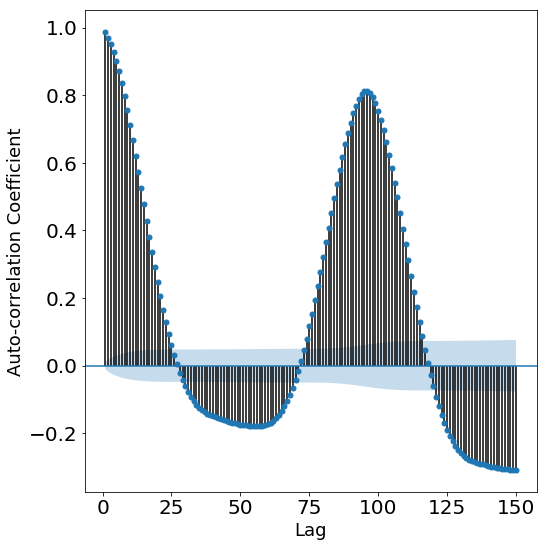

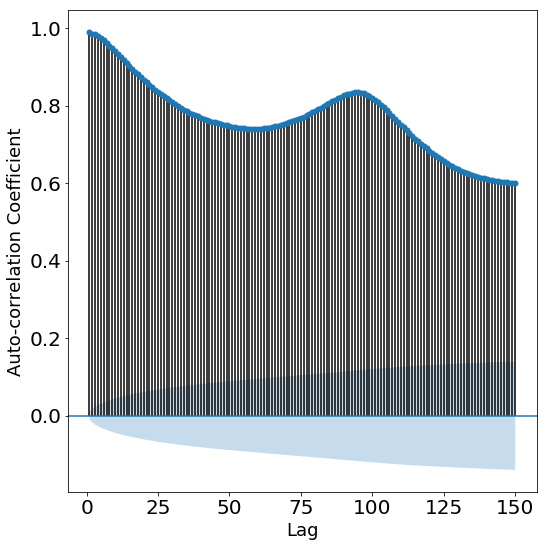

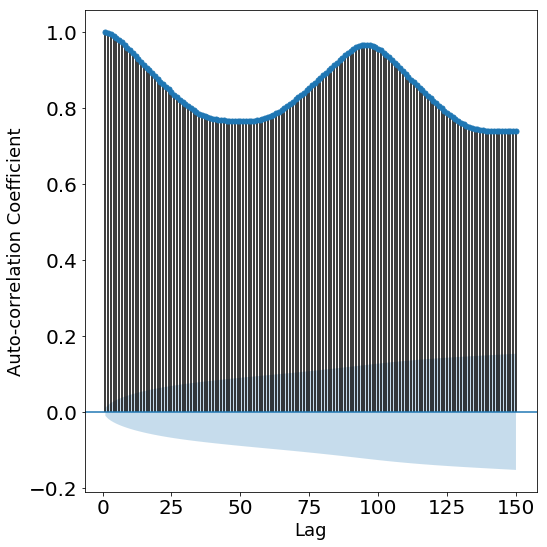

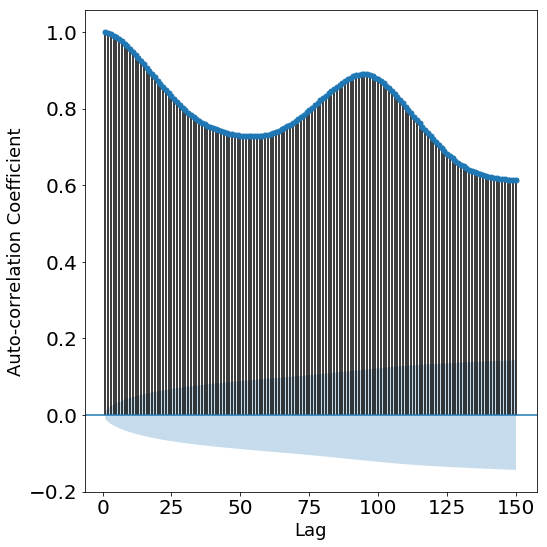

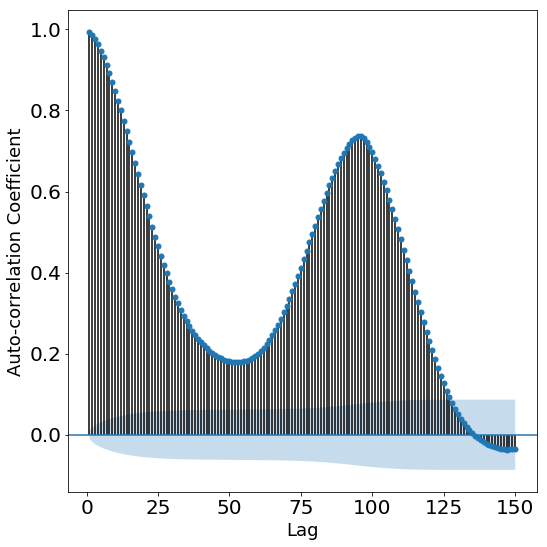

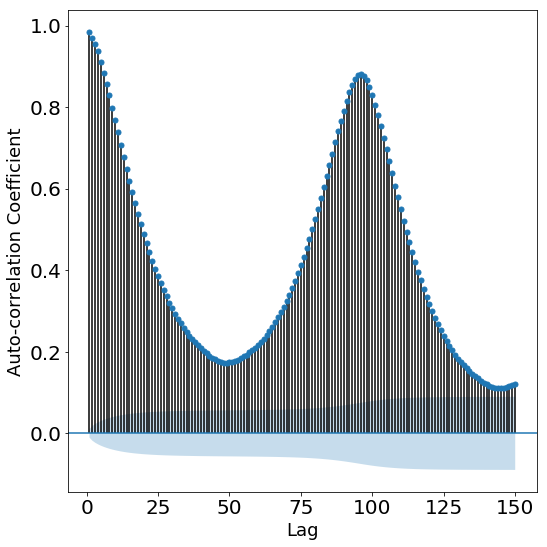

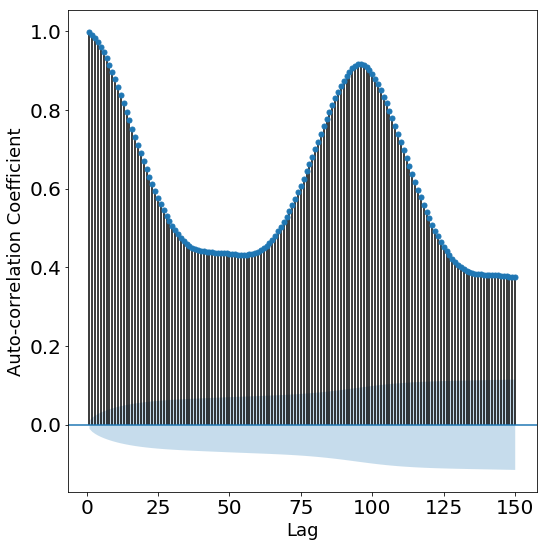

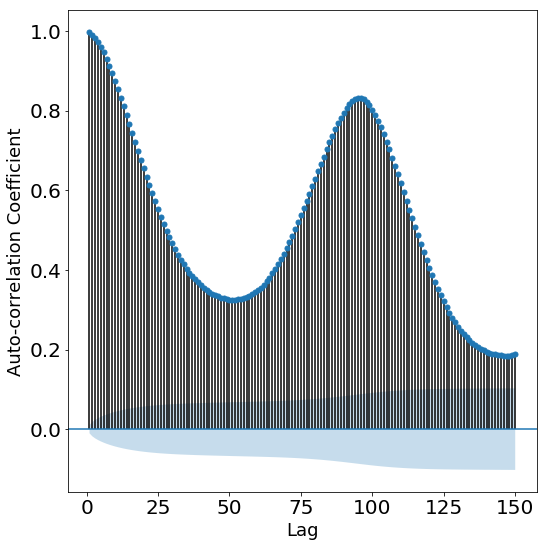

In [11]:
for name_time_series in ['DEMANDA_CEL', 'DEMANDA_NES', 'DEMANDA_NOR', 'DEMANDA_NTE', 'DEMANDA_OCC', 'DEMANDA_ORI', 'DEMANDA_PEN', 'DEMANDA_NETA_SIN']:
    df = df_all[name_time_series][idx_sub_sampling]
    df = df[:df.index.get_loc('2018-06-23 00:00:00')]
    sm.graphics.tsa.plot_acf(df.values, lags=150, zero=False, title='')
    plt.xlabel('Lag', fontsize=18)
    plt.ylabel('Auto-correlation Coefficient', fontsize=18)
    plt.tight_layout()
    plt.savefig('/Users/rafa/Dropbox/My papers/Tesis/figures/chapter7/' + name_time_series + '_acf.eps', dpi=300, format='eps')

In [19]:
demanda_neta_sin_forecast = np.zeros(92)
demanda_neta_sin_validation = np.zeros(92)

In [10]:
import nolds

In [11]:
for name_time_series in ['DEMANDA_CEL', 'DEMANDA_NES', 'DEMANDA_NOR', 'DEMANDA_NTE', 'DEMANDA_OCC', 'DEMANDA_ORI', 'DEMANDA_PEN']:
    df = df_all[name_time_series][idx_sub_sampling]
    df = df[:df.index.get_loc('2018-06-23 00:00:00')]
    print(name_time_series)
    for m in range(2, 11):
        mle = nolds.lyap_r(df.values, emb_dim=m, tau=1)#, debug_plot=True, plot_file='/Users/rafa/Dropbox/My papers/Tesis/figures/chapter2/sample_mle_1.eps')
        print(str(round(mle, 5)))

DEMANDA_CEL
0.04604
0.04456
0.03931
0.02574
0.02332
0.0201
0.01576
0.0165
0.01941
DEMANDA_NES
0.04923
0.02289
0.02104
0.01382
0.01398
0.01518
0.00959
0.01185
0.00931
DEMANDA_NOR
0.03365
0.01901
0.01544
0.01191
0.00795
0.00944
0.00597
0.00962
0.0048
DEMANDA_NTE
0.05519
0.02086
0.01954
0.0149
0.00909
0.01347
0.00977
0.01313
0.00649
DEMANDA_OCC
0.08583
0.05507
0.04485
0.03298
0.02883
0.03228
0.01901
0.02051
0.01602
DEMANDA_ORI
0.06102
0.05449
0.03126
0.03357
0.02867
0.02769
0.01976
0.0286
0.02063
DEMANDA_PEN
0.07948
0.0431
0.02931
0.02919
0.01848
0.02267
0.01709
0.02321
0.01022


/Users/rafa/PycharmProjects/da_rnn/venv/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 8808
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/Users/rafa/PycharmProjects/da_rnn/venv/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)
/Users/rafa/PycharmProjects/da_rnn/venv/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 8808
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/Users/rafa/PycharmProjects/da_rnn/venv/lib/python3.7/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 8788
  warnings.warn(msg.format(l

In [12]:
df = df_all['DEMANDA_NETA_SIN'][idx_sub_sampling]
df = df[:df.index.get_loc('2018-06-23 00:00:00')]
print(name_time_series)
for m in range(2, 11):
    mle = nolds.lyap_r(df.values, emb_dim=m, tau=1)#, debug_plot=True, plot_file='/Users/rafa/Dropbox/My papers/Tesis/figures/chapter2/sample_mle_1.eps')
    print(str(round(mle, 5)))
        

DEMANDA_PEN
0.08306
0.04737
0.03693
0.03066
0.02142
0.0258
0.0167
0.02517
0.01313


/Users/rafa/PycharmProjects/da_rnn/venv/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 8808
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/Users/rafa/PycharmProjects/da_rnn/venv/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 8808
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/Users/rafa/PycharmProjects/da_rnn/venv/lib/python3.7/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 8788
  warnings.warn(msg.format(lag), RuntimeWarning)
/Users/rafa/PycharmProjects/da_rnn/venv/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 8808
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/Users/rafa/PycharmProjects/da_rnn/venv/lib/python3.7/site-packages/nolds/measures.py:268: RuntimeWarni

In [20]:
for name_time_series in ['DEMANDA_CEL', 'DEMANDA_NES', 'DEMANDA_NOR', 'DEMANDA_NTE', 'DEMANDA_OCC', 'DEMANDA_ORI', 'DEMANDA_PEN']:
    df = df_all[name_time_series][idx_sub_sampling]
    df = df[:df.index.get_loc('2018-06-25 00:00:00')]
    validation_set = df.values[-96:]
    idx_val = np.array(range(4))
    db_val = np.array([validation_set[idx_val + i] for i in range(len(validation_set) - (4 - 1))])[2 - 1:]
    demanda_neta_sin_validation += db_val[:, 0]

In [21]:
dates_set = df.index[-96:]
db_dates = np.array([dates_set[idx_val + i] for i in range(len(dates_set) - (4 - 1))])[2 - 1:]
dates_series = db_dates[:, 0]


In [22]:
dates_series = [x.split(' ')[1][:-3] for x in dates_series]
print(dates_series)

['00:15', '00:30', '00:45', '01:00', '01:15', '01:30', '01:45', '02:00', '02:15', '02:30', '02:45', '03:00', '03:15', '03:30', '03:45', '04:00', '04:15', '04:30', '04:45', '05:00', '05:15', '05:30', '05:45', '06:00', '06:15', '06:30', '06:45', '07:00', '07:15', '07:30', '07:45', '08:00', '08:15', '08:30', '08:45', '09:00', '09:15', '09:30', '09:45', '10:00', '10:15', '10:30', '10:45', '11:00', '11:15', '11:30', '11:45', '12:00', '12:15', '12:30', '12:45', '13:00', '13:15', '13:30', '13:45', '14:00', '14:15', '14:30', '14:45', '15:00', '15:15', '15:30', '15:45', '16:00', '16:15', '16:30', '16:45', '17:00', '17:15', '17:30', '17:45', '18:00', '18:15', '18:30', '18:45', '19:00', '19:15', '19:30', '19:45', '20:00', '20:15', '20:30', '20:45', '21:00', '21:15', '21:30', '21:45', '22:00', '22:15', '22:30', '22:45', '23:00']


In [15]:
forecast_sub = dict()
validation_sub = dict()
for name_time_series in ['DEMANDA_CEL', 'DEMANDA_NES', 'DEMANDA_NOR', 'DEMANDA_NTE', 'DEMANDA_OCC', 'DEMANDA_ORI', 'DEMANDA_PEN']:
    df = df_all[name_time_series][idx_sub_sampling]
    df = df[:df.index.get_loc('2018-06-25 00:00:00')]
    time_series_scaler = MinMaxScaler()
    scaled_time_series_values = time_series_scaler.fit_transform(df.values.reshape(-1, 1))
    scaled_time_series = pd.Series(scaled_time_series_values.ravel(), index=df.index)
    time_series = scaled_time_series.values
    dates = convert_dates(scaled_time_series.index)

    (m, tau, eps) = dict_params[name_time_series]
    num_forecast = 96
    delta = 4
    h = 2

    fm = ForecastingMethods(time_series, m, tau, eps, num_forecast, mape, dates)
    score = fm.one_hour_ahead(delta, h, test=False)
    print(score)
    
    #forecast_actual = time_series_scaler.inverse_transform(forecast)
    #db_val_actual = time_series_scaler.inverse_transform(db_val)
    #print('{}: {}'.format(name_time_series, mae(forecast_actual[:, 0], db_val_actual[:, 0])))
    
    #forecast_sub[name_time_series] = forecast_actual[:, 0]
    #validation_sub[name_time_series] = db_val_actual[:, 0]

    #demanda_neta_sin_forecast += forecast_actual[:, 0]
    #demanda_neta_sin_validation += db_val_actual[:, 0]

6.958609419179483
2.2754236818638844
1.4163620031282347
2.9470618381245166
4.256577175223931
4.991013308812431
2.2073173873845873


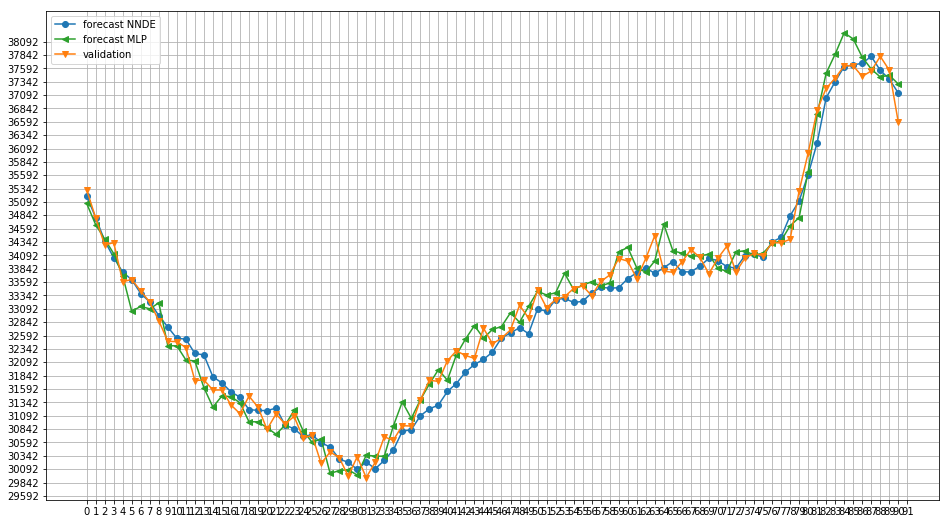

In [54]:
pylab.rcParams['figure.figsize'] = (16.0, 9.0)
mlp_old = [35065.23525781327, 34666.741530764404, 34398.55982362499, 34125.727483402494, 33710.18868769056, 33048.59893645327, 33137.90011577932, 33092.40167045962, 33204.98118317861, 32401.791263328807, 32400.859449708136, 32137.136248781557, 32115.702674862652, 31617.846152197275, 31253.77094579693, 31462.7568365085, 31450.65952097737, 31334.18252734758, 30979.832551620693, 30978.284489432375, 30868.550855966154, 30745.224676402657, 30915.82574676768, 31193.221406367113, 30812.00819172053, 30594.48087053667, 30657.248524942377, 30012.068130211665, 30065.994428409405, 30082.95346910615, 29982.38858921347, 30354.483412553982, 30336.48253517142, 30334.475079656622, 30897.360205023193, 31350.8210759049, 31043.977841733038, 31388.044008966448, 31685.036527591186, 31953.55964736691, 31758.342605743244, 32232.944735469897, 32524.31200952544, 32779.56091884677, 32543.7780682271, 32706.865920059834, 32761.487824478263, 33020.094926135585, 32840.520382899755, 33137.82449909481, 33420.24368884427, 33351.84013001927, 33391.79345438349, 33756.09269013834, 33453.14375972694, 33537.22710813497, 33598.361672641004, 33518.78074231918, 33576.72850747127, 34157.140860473046, 34242.374553468086, 33859.06550813088, 33779.81380083893, 33989.24662263062, 34673.454553200834, 34181.505328813226, 34132.545558739606, 34078.9290095318, 34085.35356044706, 34113.02887834235, 33848.65408982467, 33794.65702518215, 34159.214282343484, 34178.81644642297, 34095.57956988416, 34133.90598513701, 34316.80830473993, 34365.371692736364, 34646.34100129659, 34798.520100352725, 35659.48979821386, 36730.81079363964, 37500.840502480685, 37859.35507802738, 38257.973313912604, 38143.07655486573, 37802.5958317569, 37580.007448988574, 37430.919245055375, 37464.774547791516, 37299.608430210246]#, 36359.641034797634]#, 35565.050076598905, 35565.79612755733, 35366.83081532151, 34813.36043111599]
plot(demanda_neta_sin_forecast[1:], marker='o', label='forecast NNDE', color='C0')
plot(mlp_old, marker='<', label='forecast MLP', color='C2')
plot(demanda_neta_sin_validation[1:], marker='v', label='validation', color='C1')

plt.xticks(np.arange(92))
plt.yticks(np.arange(np.min(demanda_neta_sin_forecast) - 500, np.max(demanda_neta_sin_forecast) + 500, 250))
plt.title('')
plt.legend()
plt.grid(which='both')
plt.savefig('/Users/rafa/CENACE/19 mar/demanda_neta_sin_comparison.png')
plt.show()

In [11]:
print(mae(demanda_neta_sin_forecast, demanda_neta_sin_validation))

213.30742388148278


In [35]:
print(mae(mlp_old[:-1], demanda_neta_sin_validation[1:]))

246.6533540651737


In [15]:
[(i, x) for i, x in enumerate(np.abs(demanda_neta_sin_forecast - demanda_neta_sin_validation)) if x >= 500]

[(13, 506.4916603043748),
 (39, 535.9561484018268),
 (41, 575.3013862987464),
 (42, 611.2097726562752),
 (45, 587.028195000792),
 (60, 547.5320187741454),
 (64, 707.6704034121794),
 (82, 614.5128859473261),
 (91, 547.9689919705415)]

In [21]:
[(i, x) for i, x in enumerate(np.abs(mlp_old - demanda_neta_sin_validation)) if x >= 500]

[(1, 654.6649633762208),
 (4, 622.2117029344372),
 (5, 552.1359268279775),
 (6, 503.4256898847452),
 (14, 508.7463881874464),
 (35, 717.5506901627123),
 (43, 560.5982723623965),
 (81, 724.7119166865159),
 (82, 689.6600825588102),
 (83, 641.1773436523799),
 (84, 848.3940902797913),
 (85, 503.0672775219791)]

In [27]:
abs_errors_nnde = np.abs(demanda_neta_sin_forecast - demanda_neta_sin_validation)
abs_errors_mlp = np.abs(mlp_old - demanda_neta_sin_validation)

errors_nnde = demanda_neta_sin_forecast - demanda_neta_sin_validation
errors_mlp = mlp_old - demanda_neta_sin_validation

In [22]:
from scipy.stats import norm

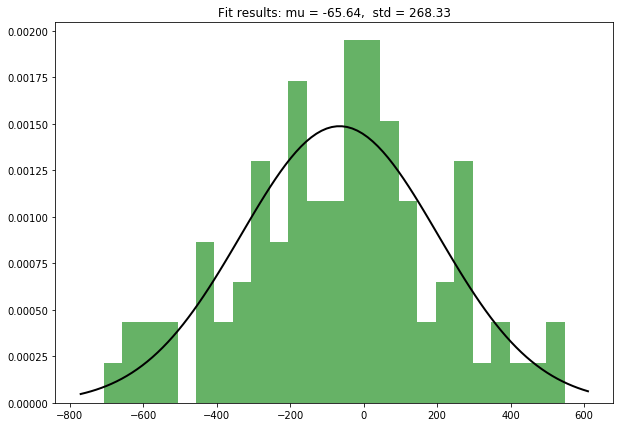

In [44]:
plt.hist(errors_nnde, bins=25, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu, std = norm.fit(errors_nnde)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.show()

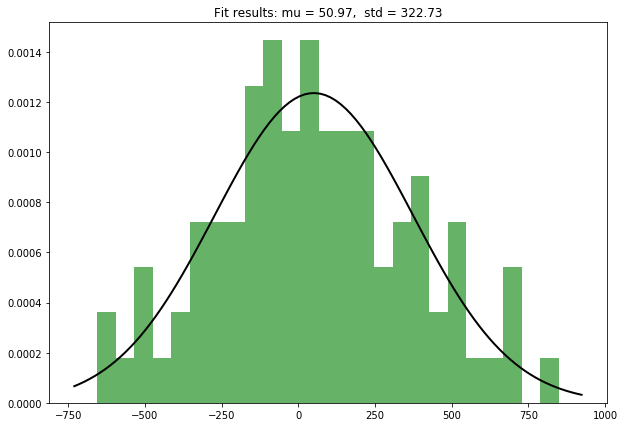

In [45]:
plt.hist(errors_mlp, bins=25, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu, std = norm.fit(errors_mlp)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.show()

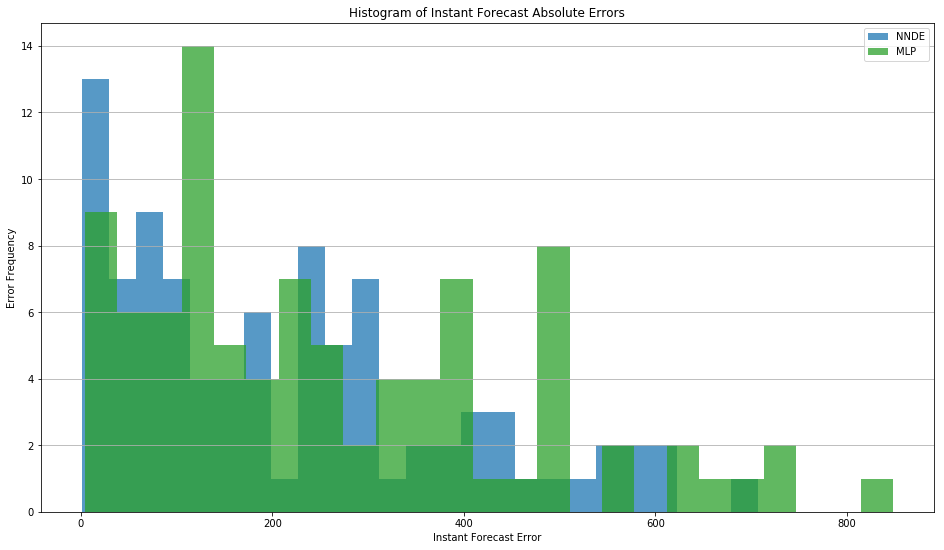

In [68]:
n, bins, patches = plt.hist(abs_errors_nnde, 25, density=False, facecolor='C0', alpha=0.75, label='NNDE')
n, bins, patches = plt.hist(abs_errors_mlp, 25, density=False, facecolor='C2', alpha=0.75, label='MLP')
plt.legend()
plt.xlabel('Instant Forecast Error')
plt.ylabel('Error Frequency')
plt.title('Histogram of Instant Forecast Absolute Errors')
plt.grid(which='major', axis='y')
plt.savefig('/Users/rafa/CENACE/19 mar/absolute_error_histogram.png')
plt.show()

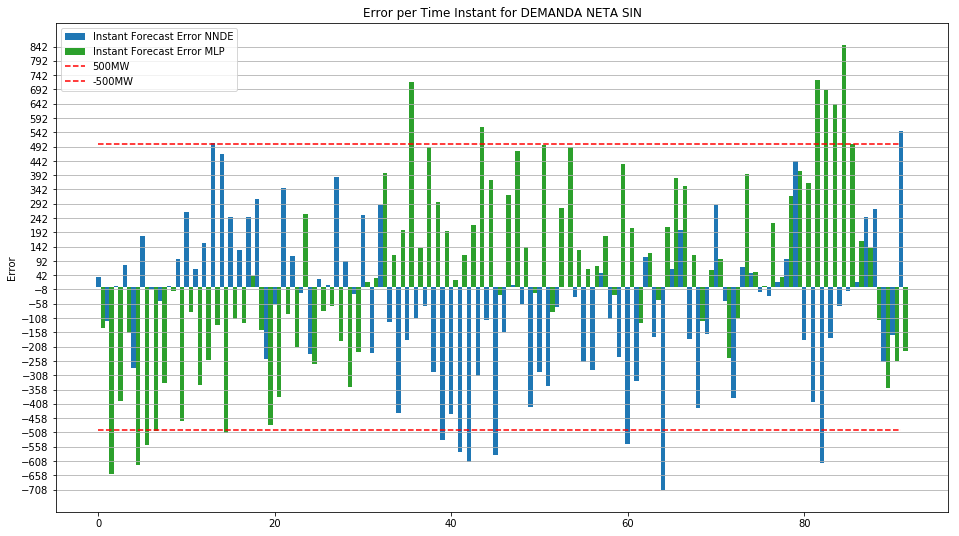

In [66]:
w = 0.5
l = np.arange(92)

fig = plt.figure()
ax = fig.add_subplot(111)

rects4 = ax.bar(l + w, errors_mlp, width=w, color='C2')
rects3 = ax.bar(l, errors_nnde, width=w, color='C0')

qmw = ax.plot(l, [500] * 92, color='red', linestyle='--')
mqmw = ax.plot(l, [-500] * 92, color='red', linestyle='--')

ax.set_ylabel('Error')    
max_top = np.max([np.max(errors_mlp), np.max(errors_nnde)])
min_bot = np.min([np.min(errors_mlp), np.min(errors_nnde)])

plt.title('Error per Time Instant for DEMANDA NETA SIN')
plt.yticks(np.arange(min_bot, max_top, 50))
ax.legend((rects3[0], rects4[0], qmw[0], mqmw[0]), ('Instant Forecast Error NNDE',
                                                    'Instant Forecast Error MLP',
                                                    '500MW', '-500MW'))
plt.grid(which='major', axis='y')
# autolabel(rects3)
# autolabel(rects4)
plt.savefig('/Users/rafa/CENACE/19 mar/barplot_errors_comparison_demanda_neta_sin.png')
plt.show()

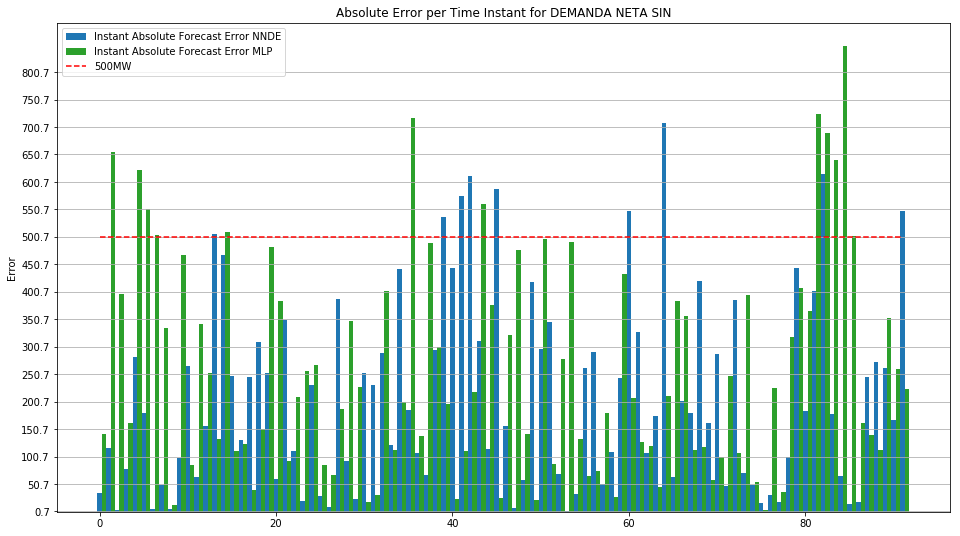

In [67]:
w = 0.5
l = np.arange(92)

fig = plt.figure()
ax = fig.add_subplot(111)

rects4 = ax.bar(l + w, abs_errors_mlp, width=w, color='C2')
rects3 = ax.bar(l, abs_errors_nnde, width=w, color='C0')

qmw = ax.plot(l, [500] * 92, color='red', linestyle='--')

ax.set_ylabel('Error')    
max_top = np.max([np.max(abs_errors_mlp), np.max(abs_errors_nnde)])
min_bot = np.min([np.min(abs_errors_mlp), np.min(abs_errors_nnde)])

plt.title('Absolute Error per Time Instant for DEMANDA NETA SIN')
plt.yticks(np.arange(min_bot, max_top, 50))
ax.legend((rects3[0], rects4[0], qmw[0]), ('Instant Absolute Forecast Error NNDE',
                                    'Instant Absolute Forecast Error MLP', '500MW'))
plt.grid(which='major', axis='y')
# autolabel(rects3)
# autolabel(rects4)
plt.savefig('/Users/rafa/CENACE/19 mar/barplot_errors_absolute_comparison_demanda_neta_sin.png')

plt.show()

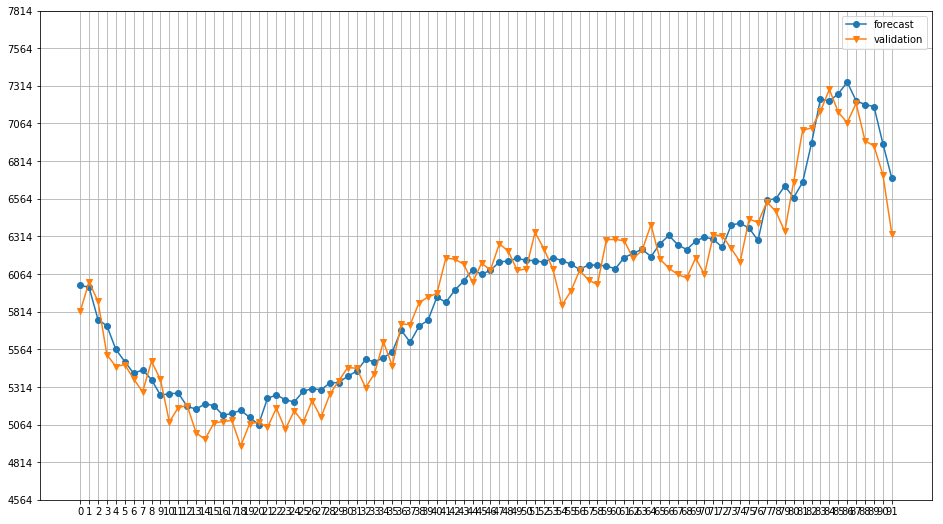

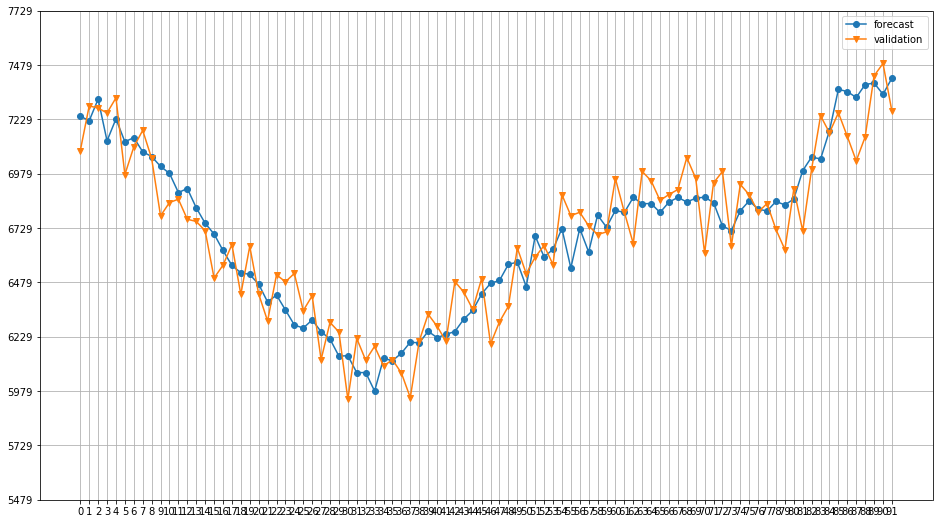

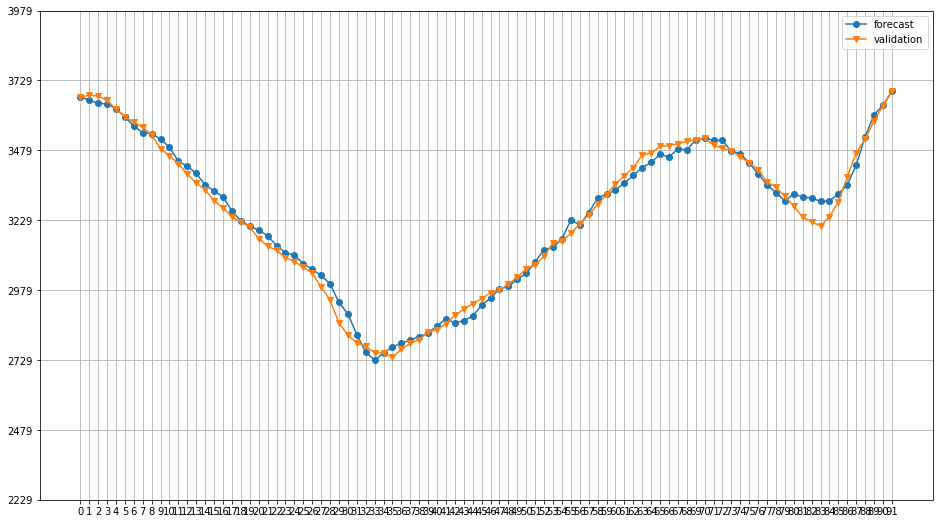

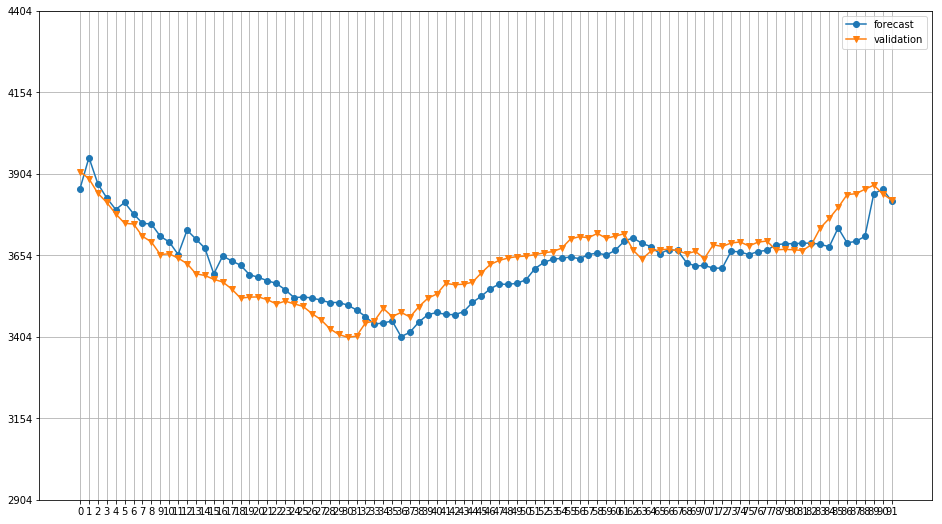

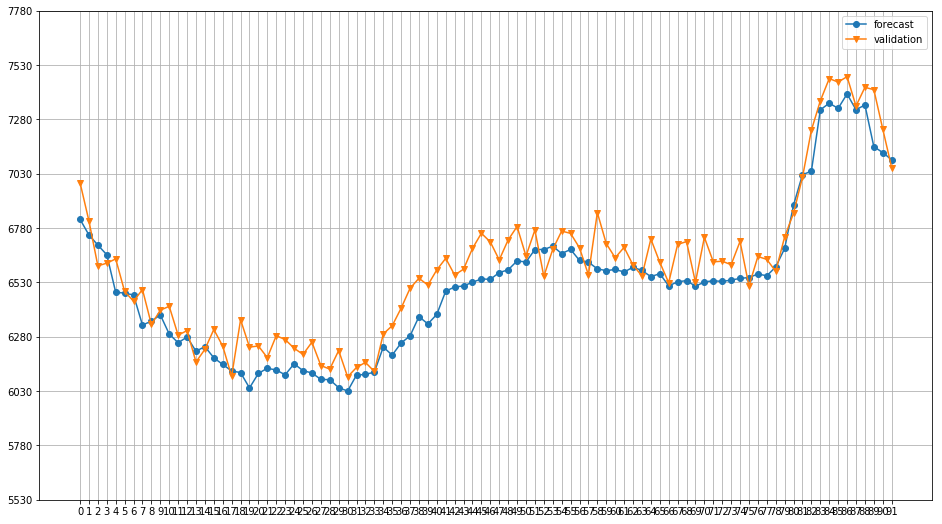

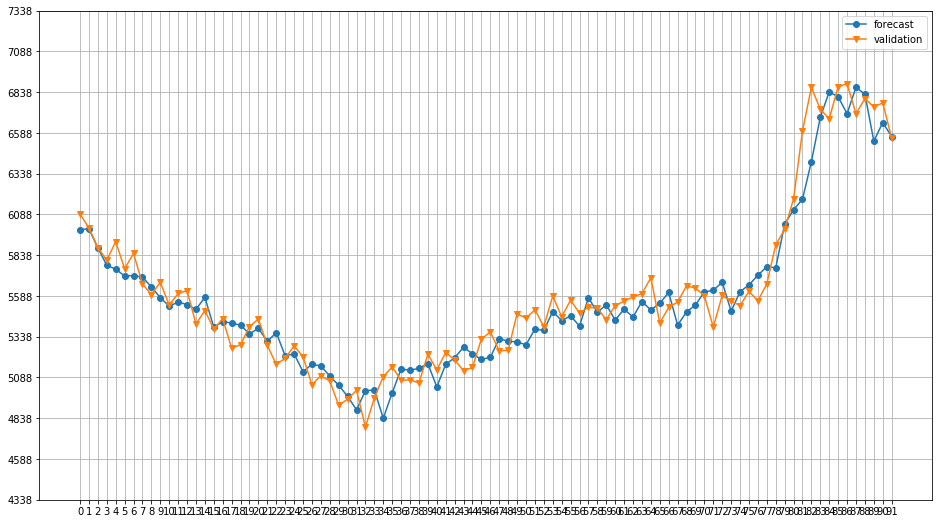

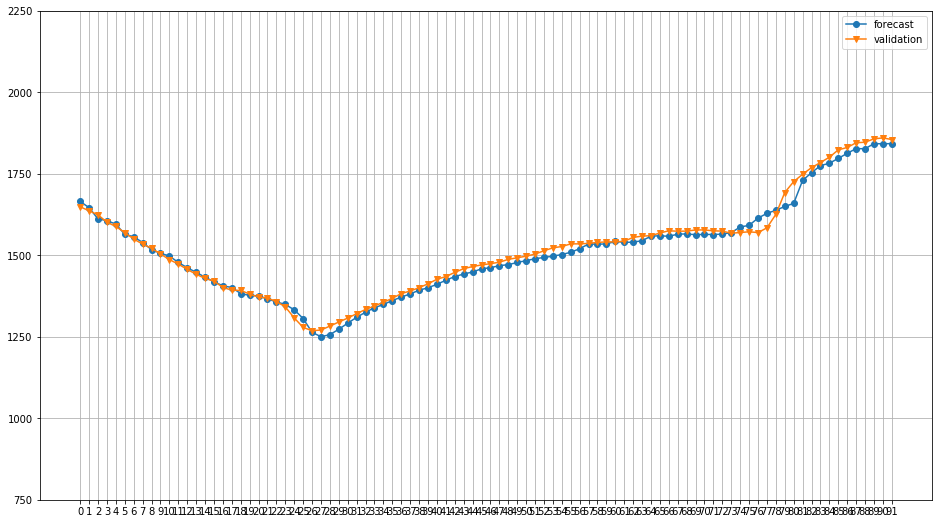

In [18]:
for name_series in ['DEMANDA_CEL', 'DEMANDA_NES', 'DEMANDA_NOR', 'DEMANDA_NTE', 'DEMANDA_OCC', 'DEMANDA_ORI', 'DEMANDA_PEN']:
    plot(forecast_sub[name_series], marker='o', label='forecast')
    plot(validation_sub[name_series], marker='v', label='validation')
    
    plt.xticks(np.arange(92))
    plt.yticks(np.arange(np.min(forecast_sub[name_series]) - 500, np.max(forecast_sub[name_series]) + 500, 250))
    plt.title('')
    plt.legend()
    plt.grid(which='both')
    # plt.savefig('/Users/rafa/demanda_neta_sin_comparison.png')
    plt.show()

In [14]:
nnde_forecast = [35240.83431198, 35204.79270319,  34799.09617261,  34364.56663689,
 34049.96297745, 33780.2241503 ,  33636.72255262,  33378.70297519,
 33221.9289677, 32966.61152641,  32751.1855682 ,  32541.60564247,
 32525.25087761, 32257.10823745,  32230.3766718 ,  31820.7303864 ,
 31706.19029391, 31539.6424961 ,  31439.78658947,  31207.24732523,
 31191.93662034, 31187.11000362,  31235.86932448,  30917.76489767,
 30848.10855718, 30707.01128652,  30733.25073046,  30587.48809707,
 30506.0670479 , 30286.51470342,  30217.67893311,  30092.42522867,
 30224.5794522 , 30100.23083946,  30255.6253374 ,  30448.44727913,
 30799.87885481, 30832.01155903,  31090.42963025,  31220.7770059 ,
 31291.18605195, 31546.39648968,  31695.28619902,  31908.02188171,
 32052.00828114, 32145.36780109,  32283.27970581,  32550.34520412,
 32639.64578272, 32740.8756329 ,  32627.60291519,  33094.23834882,
 33045.02818386, 33264.05269018,  33288.89681504,  33211.20896704,
 33232.49664301, 33389.86379152,  33494.59285421,  33480.10436182,
 33486.8118533 , 33658.73100868,  33766.89233865,  33860.46709074,
 33755.67273624, 33861.40132433,  33978.12475381,  33787.28704588,
 33782.11172887, 33892.02474736,  34036.68919032,  33994.23574458,
 33881.13717317, 33853.62092726,  34090.48715872,  34113.98435297,
 34060.55390029, 34345.84237923,  34428.14993787,  34835.1632017,
 35109.41957376, 35604.93438438,  36196.66753397,  37040.40219131,
 37344.69008236, 37625.76515289,  37658.49080468,  37686.76688515,
 37817.18552615, 37555.82141896,  37391.7839805 ,  37131.52758572]
 
mlp_small_forecast = [35368.5915238, 35124.33478536, 34695.7968766, 34428.51355728,
 34058.32558399, 33813.36004797, 33571.9574201, 33292.84668666,
 33158.10709919, 32869.79834643, 32674.87096362, 32514.01949346,
 32154.76564781, 32089.05294025, 32014.99883128, 31830.87597589,
 31611.52010217, 31538.91882889, 31490.34931349,  31186.24304905,
 31068.66855975, 31197.11190098, 31068.81020246,  30963.03974564,
 31035.0617811 , 30858.49462984, 30831.87799791,  30681.46935841,
 30658.28292122, 30378.16248508, 30411.23463785,  30444.27796347,
 30347.87742117, 30439.64726322, 30446.01813818,  30758.24490502,
 31095.10558457, 31184.00510986, 31222.93497202,  31326.53615351,
 31515.36974888, 31962.08824357, 32247.3020559,  32340.62677555,
 32397.22819844, 32503.19831299, 32593.0252593,  32784.65564142,
 32895.17612917, 32729.97555877, 32698.02238868,  33008.75916459,
 33062.18079762, 33285.36873645, 33252.74556097,  33329.21598062,
 33332.19203615, 33575.84435317, 33638.18821834,  33501.45883026,
 33596.68198229, 33646.37834703, 33828.00243754,  33880.39141965,
 33957.51244401, 33951.65807147, 34162.4443197,  34143.94417575,
 33941.10920906, 33958.72844484, 34086.74262216,  34099.23117215,
 34016.70313294, 34013.49405218, 34049.89350896,  33991.03401831,
 34258.73448678, 34759.69672507, 35037.43524029,  35500.08682356,
 35927.02061543, 36078.89710812, 36442.84065345,  36851.36981575,
 37116.45807536, 37274.54796972, 37589.6858533,  37611.17510772,
 37588.8164595, 37439.38726564, 37084.95092428,  37022.53155057]

In [15]:
mlp_big_forecast = [35458.85099331, 35280.80229375, 34639.62694147,
 34479.68237085, 34104.83680748, 33642.99977191, 33720.93695265,
 33304.09128307, 33209.37973836, 32881.09201723, 32761.12254706,
 32618.82631321, 32233.85026183, 32264.98517189, 32235.37884818,
 31660.73368602, 31567.88459171, 31455.49149085, 31426.6793392 ,
 31190.35964102, 31107.08354301, 31369.34083393, 31493.59294406,
 31181.1703069 , 31040.90657945, 30908.59150106, 30984.5452312 ,
 30670.07932382, 30489.83158792, 30291.93266965, 30446.7099874 ,
 30512.95821489, 30595.96633085, 30823.49569864, 30588.22677212,
 30829.49646719, 31381.2166694 , 31483.23938512, 31616.6815717 ,
 31555.33892488, 31724.6648463 , 32171.69946235, 32289.67527484,
 32677.30021606, 32754.10837091, 32672.3722417 , 32559.7837218 ,
 32980.61622731, 33055.51528854, 32973.74711531, 32953.76148277,
 33308.64830768, 33347.33601799, 33654.78102184, 33438.20091936,
 33560.21164927, 33391.29769147, 33617.87498688, 33668.60690295,
 33576.62326009, 33632.21782525, 33769.72805584, 33983.58978307,
 34153.97810603, 34043.11841669, 34070.34989498, 34437.50217167,
 33955.88500594, 33878.85353272, 33955.113042  , 34165.44974145,
 34226.79288316, 34020.94772841, 33933.88554903, 34208.50385157,
 34115.55262468, 34101.15471452, 34341.75000051, 34315.37406043,
 34555.8075798 , 34999.73850363, 35446.59693943, 36203.39639482,
 37167.38642076, 37863.19051722, 37821.13144197, 37767.26977472,
 37917.5218335 , 37891.18981477, 37582.05237012, 37380.79588191,
 37382.89000192]

In [16]:
da_rnn_forecast = [38259.5, 37274.434, 36930.63, 36335.504, 35761.156, 35369.094, 35118.516, 34747.367, 34367.688, 34131.12, 33685.44, 33482.61, 33362.156, 33178.207, 32815.566, 32741.557, 32531.48, 32257.496, 32231.475, 32118.46, 31834.043, 31601.475, 31470.855, 31355.713, 31204.467, 31116.338, 31172.28, 31242.635, 31234.143, 31174.955, 31020.818, 30794.863, 30558.854, 30490.223, 30117.594, 30018.305, 30263.467, 30432.45, 30699.98, 30616.992, 30594.053, 30965.129, 30991.965, 31579.166, 31538.58, 31657.283, 32002.166, 32224.217, 32714.035, 32867.82, 32797.797, 32587.766, 32863.49, 33051.4, 33136.188, 33052.664, 33170.664, 33197.504, 33703.137, 33657.31, 33571.49, 33413.92, 33638.52, 33812.31, 33637.875, 33565.13, 33663.637, 33934.504, 34116.383, 34092.266, 34035.06, 34457.11, 34257.543, 34050.613, 33867.094, 33953.695, 34147.816, 34073.35, 34047.066, 34099.91, 34109.008, 34092.004, 34419.84, 34460.145, 34714.15, 35203.094, 35998.117, 36564.33, 37415.223, 37622.82, 37532.17, 37599.13, 37645.42, 37504.27, 37453.16, 37447.09]

In [17]:
nnde_forecast = np.array(nnde_forecast)
mlp_small_forecast = np.array(mlp_small_forecast)
#d = np.array(d)
da_rnn_forecast = np.array(da_rnn_forecast[4:])
bagging_forecast = (nnde_forecast + mlp_small_forecast  + da_rnn_forecast) / 3

In [16]:
all_forecasts = [[a, b, c] for a, b, c in zip(nnde_forecast, mlp_small_forecast, da_rnn_forecast)]
bagging_median = np.median(all_forecasts, axis=1)

In [92]:
mae(bagging_median, demanda_neta_sin_validation)

195.32579180824766

In [12]:
mae(nnde_forecast, demanda_neta_sin_validation)

213.30742388148792

In [13]:
mae(mlp_small_forecast, demanda_neta_sin_validation)

232.43475218539453

In [14]:
mae(da_rnn_forecast, demanda_neta_sin_validation)

240.50010973590332

In [15]:
mae(bagging_forecast, demanda_neta_sin_validation)

199.06454040685495

In [16]:
mae((nnde_forecast + mlp_small_forecast) / 2, demanda_neta_sin_validation)

203.12601506302337

In [17]:
mae((nnde_forecast + da_rnn_forecast) / 2, demanda_neta_sin_validation)

205.74644850240495

In [18]:
mae((mlp_small_forecast + da_rnn_forecast) / 2, demanda_neta_sin_validation)

207.1054937269975

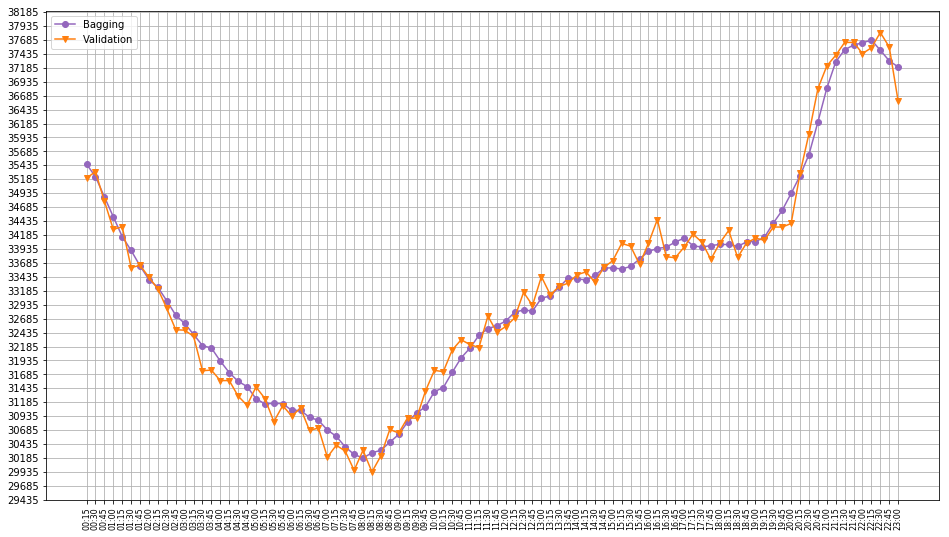

In [97]:
#plot(demanda_neta_sin_forecast, marker='o', label='NNDE', color='C0')
#plot(b, marker='<', label='MLP', color='C2')
pylab.rcParams['figure.figsize'] = (16.0, 9.0)
plot(bagging_forecast, marker='o', label='Bagging', color='C4')
plot(demanda_neta_sin_validation, marker='v', label='Validation', color='C1')

# plt.xticks(np.arange(92))
x = np.arange(92)
plt.xticks(x, dates_series, rotation = 'vertical', fontsize = 8)
plt.yticks(np.arange(np.min(demanda_neta_sin_validation) - 500, np.max(demanda_neta_sin_validation) + 500, 250))
plt.title('')
plt.legend()
plt.grid(which='both')
plt.savefig('/Users/rafa/CENACE/30 may/demanda_neta_sin_comparison_bagging.png')
plt.show()

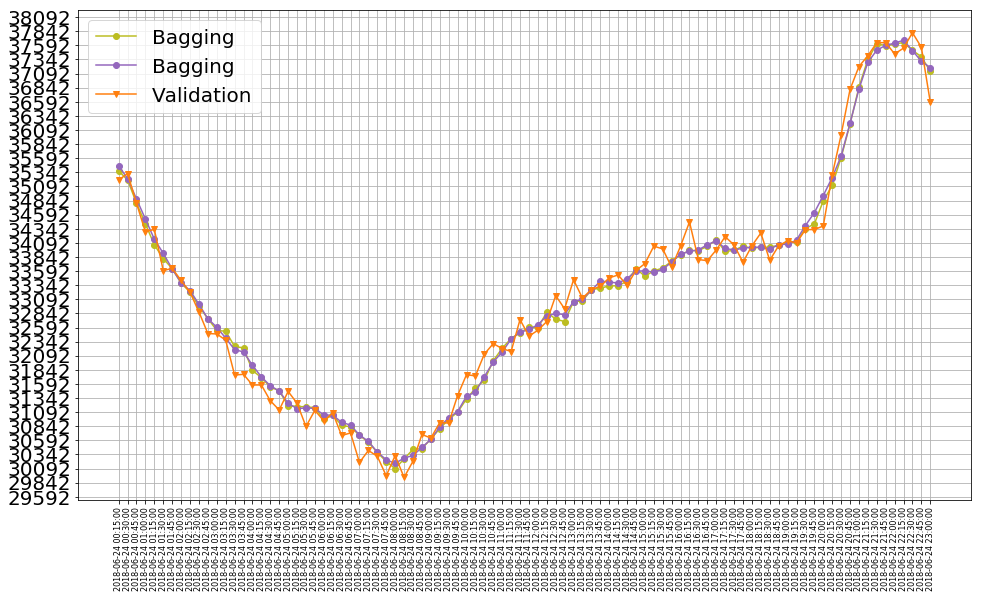

In [21]:
#plot(demanda_neta_sin_forecast, marker='o', label='NNDE', color='C0')
#plot(b, marker='<', label='MLP', color='C2')
pylab.rcParams['figure.figsize'] = (16.0, 9.0)
plot(bagging_median, marker='o', label='Bagging', color='C8')
plot(bagging_forecast, marker='o', label='Bagging', color='C4')
plot(demanda_neta_sin_validation, marker='v', label='Validation', color='C1')

# plt.xticks(np.arange(92))
x = np.arange(92)
plt.xticks(x, dates_series, rotation = 'vertical', fontsize = 8)
plt.yticks(np.arange(np.min(bagging_median) - 500, np.max(bagging_median) + 500, 250))
plt.title('')
plt.legend()
plt.grid(which='both')
# plt.savefig('/Users/rafa/CENACE/30 may/demanda_neta_sin_comparison_bagging.png')
plt.show()

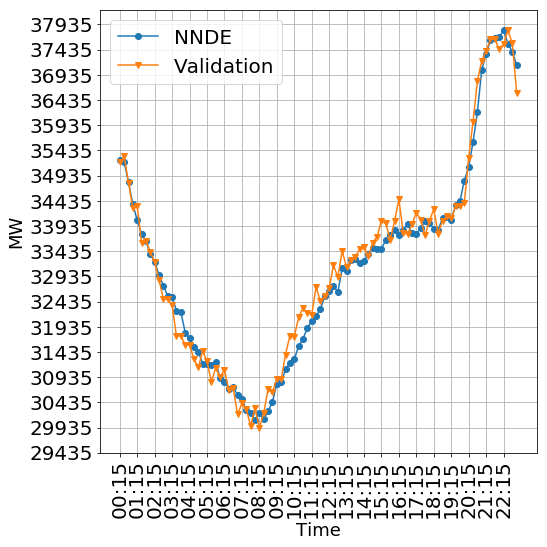

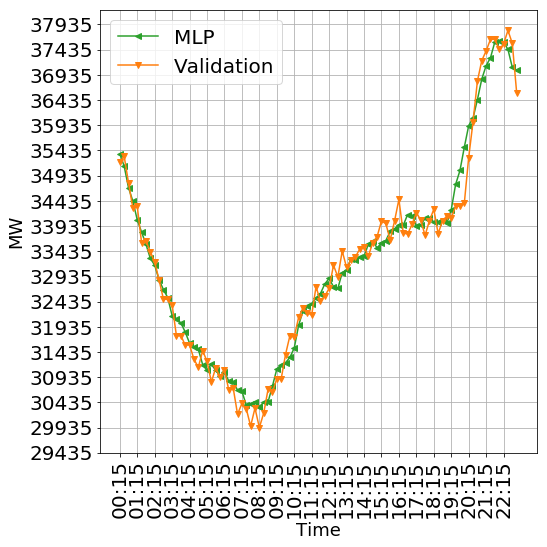

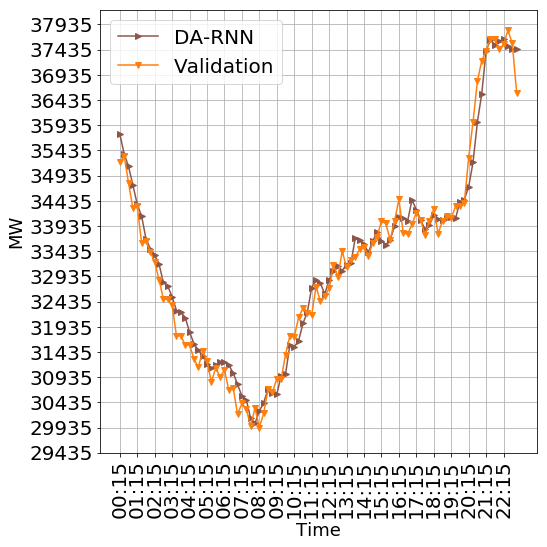

In [24]:
for forecast, forecast_legend, f_marker, f_color in zip ([nnde_forecast, mlp_small_forecast, da_rnn_forecast, bagging_forecast], 
                                                         ['NNDE', 'MLP', 'DA-RNN', 'Bagging'],
                                                         ['o', '<', '>'],
                                                         ['C0', 'C2', 'C5']):
    plot(forecast, marker=f_marker, label=forecast_legend, color=f_color)
    plot(demanda_neta_sin_validation, marker='v', label='Validation', color='C1')
    x = np.arange(0, 92, 4)
    temp_date = [dates_series[i] for i in range(0, 92, 4)]
    plt.xticks(x, temp_date, rotation = 'vertical', fontsize = 20)
    plt.yticks(np.arange(np.min(demanda_neta_sin_validation) - 500, np.max(demanda_neta_sin_validation) + 500, 500))
    #plt.title('{} Forecasts vs Validation'.format(forecast_legend))
    plt.legend()
    plt.grid(which='major')
    plt.xlabel('Time', fontsize=18)
    plt.ylabel('MW', fontsize=18)
    plt.tight_layout()
    plt.savefig('/Users/rafa/Dropbox/My papers/Tesis/figures/chapter7/demanda_neta_sin_comparison_{}.eps'.format(forecast_legend), dpi=300)
    plt.show()
    
    
    

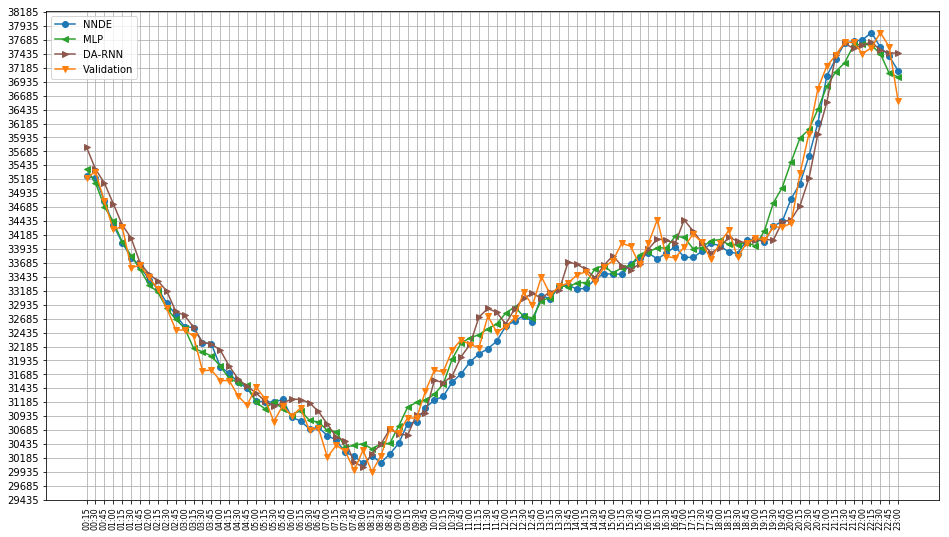

In [99]:
plot(nnde_forecast, marker='o', label='NNDE', color='C0')
plot(mlp_small_forecast, marker='<', label='MLP', color='C2')
plot(da_rnn_forecast, marker='>', label='DA-RNN', color='C5')
# plot(c, marker='o', label='Bagging', color='C4')
plot(demanda_neta_sin_validation, marker='v', label='Validation', color='C1')

x = np.arange(92)
plt.xticks(x, dates_series, rotation = 'vertical', fontsize = 20)
plt.yticks(np.arange(np.min(demanda_neta_sin_validation) - 500, np.max(demanda_neta_sin_validation) + 500, 250))
plt.title('')
plt.legend()
plt.grid(which='both')
plt.savefig('/Users/rafa/CENACE/30 may/demanda_neta_sin_comparison_bagging_all.png')
plt.show()

In [21]:
[(i, x) for i, x in enumerate(np.abs(bagging_forecast - demanda_neta_sin_validation)) if x >= 500]

[(64, 520.153746231772),
 (79, 539.8815937064574),
 (82, 598.6386907818742),
 (91, 616.8244516799969)]

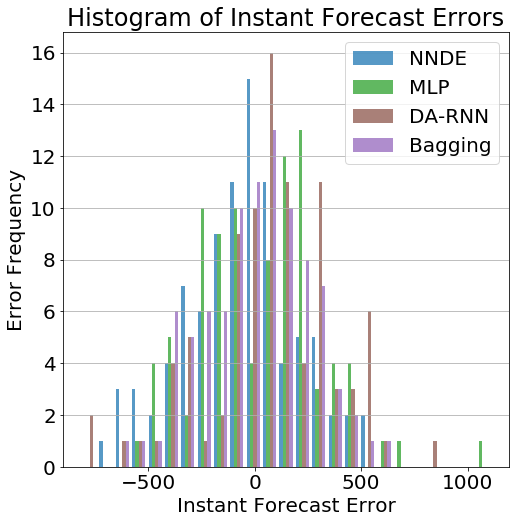

In [20]:
l = np.arange(25)
w = 0.25
errors_nnde = nnde_forecast - demanda_neta_sin_validation
errors_mlp = mlp_small_forecast - demanda_neta_sin_validation
errors_da_rnn = da_rnn_forecast - demanda_neta_sin_validation
errors_bagging = bagging_forecast - demanda_neta_sin_validation
n, bins, patches = plt.hist([errors_nnde, errors_mlp, errors_da_rnn, errors_bagging], 
                            25, density=False, alpha=0.75, label=['NNDE', 'MLP', 'DA-RNN', 'Bagging'], color=['C0', 'C2', 'C5', 'C4'])
#n, bins, patches = plt.hist(np.abs(l + w, b - demanda_neta_sin_validation), 25, density=False, facecolor='C2', alpha=0.75, label='C')
#n, bins, patches = plt.hist(np.abs(l + 2*w, c - demanda_neta_sin_validation), 25, density=False, facecolor='C3', alpha=0.75, label='C')
plt.legend()
plt.xlabel('Instant Forecast Error')
plt.ylabel('Error Frequency')
plt.title('Histogram of Instant Forecast Errors')
plt.grid(which='major', axis='y')
# plt.savefig('/Users/rafa/CENACE/30 may/error_histogram_all.png')
plt.show()

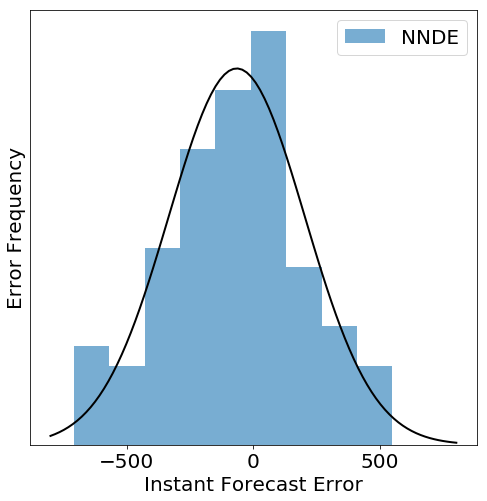

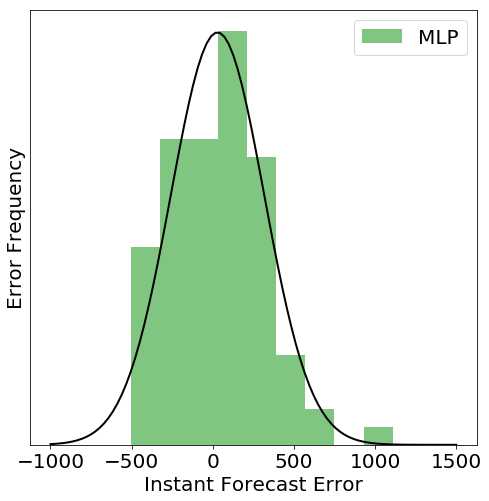

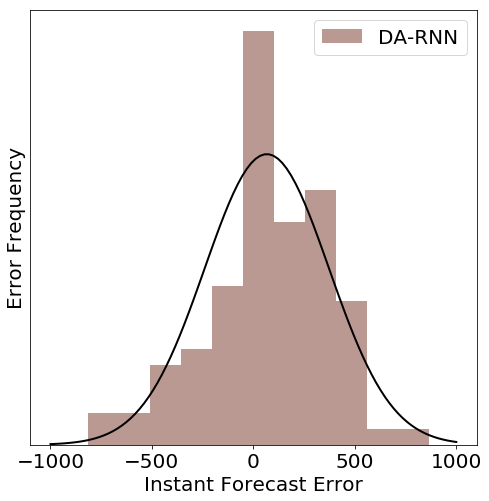

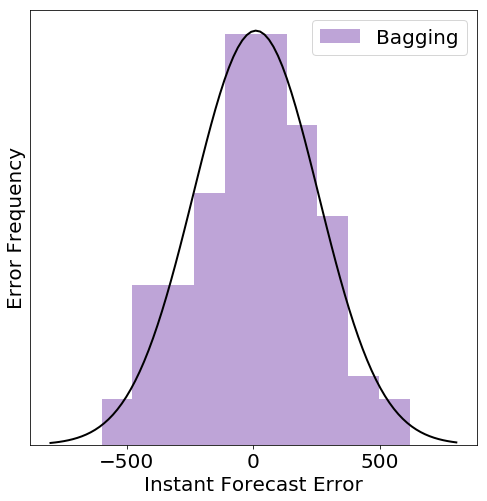

In [23]:
pylab.rcParams['figure.figsize'] = (8.0, 8.0)
for error, error_legend, e_color in zip ([errors_nnde, errors_mlp, errors_da_rnn, errors_bagging], 
                                         ['NNDE', 'MLP', 'DA-RNN', 'Bagging'], 
                                         ['C0', 'C2', 'C5', 'C4']):

    n, bins, patches = plt.hist(error, 'auto', density=True, alpha=0.6, label=error_legend, color=e_color)
    mu, std = norm.fit(error)

    plt.legend()
    plt.xlabel('Instant Forecast Error')
    plt.ylabel('Error Frequency')
    plt.yticks([])
    #plt.title('Histogram of Instant Forecast Errors (mu: {}, std: {})'.format(round(mu, 2), round(std, 2)))
    plt.grid(which='major', axis='y')

    xt = plt.xticks()[0]  
    xmin, xmax = min(xt), max(xt)  
    x = np.linspace(xmin, xmax, len(error))
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.savefig('/Users/rafa/Dropbox/My papers/Tesis/figures/chapter7/error_histogram_{}.eps'.format(error_legend), dpi=300)
    plt.show()
    # print('mu: {} std:{}'.format(mu, std))



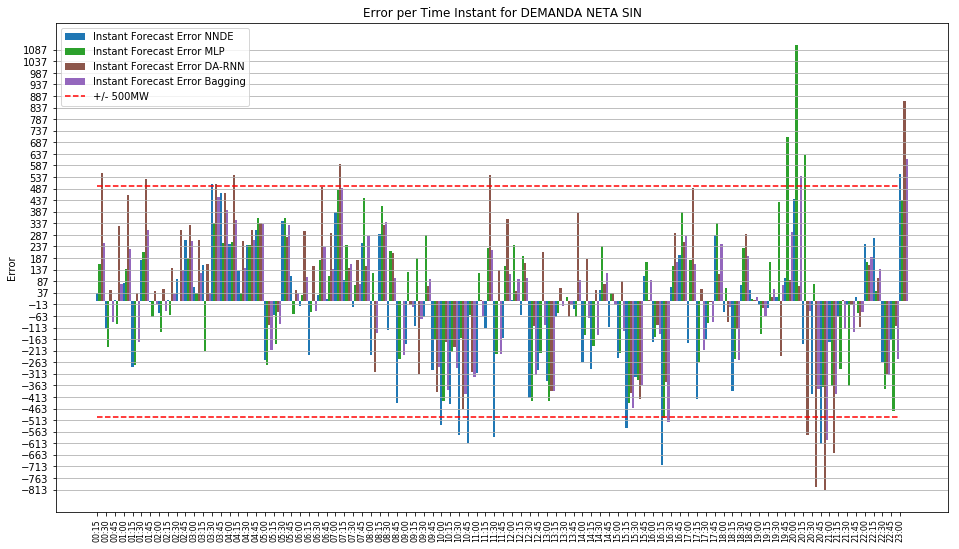

In [86]:
w = 0.25
l = np.arange(92)

fig = plt.figure()
ax = fig.add_subplot(111)

rects0 = ax.bar(l, errors_nnde, width=w, color='C0')
rects1 = ax.bar(l + w, errors_mlp, width=w, color='C2')
rects2 = ax.bar(l + 2*w, errors_da_rnn, width=w, color='C5')
rects3 = ax.bar(l + 3*w, errors_bagging, width=w, color='C4')

qmw = ax.plot(l, [500] * 92, color='red', linestyle='--')
mqmw = ax.plot(l, [-500] * 92, color='red', linestyle='--')

ax.set_ylabel('Error')    
max_top = np.max([np.max(errors_bagging), np.max(errors_nnde), np.max(errors_da_rnn), np.max(errors_mlp)])
min_bot = np.min([np.min(errors_bagging), np.min(errors_nnde), np.min(errors_da_rnn), np.min(errors_mlp)])

plt.title('Error per Time Instant for DEMANDA NETA SIN')
x = np.arange(92)
plt.xticks(x, dates_series, rotation = 'vertical', fontsize = 8)
plt.yticks(np.arange(min_bot, max_top, 50))
ax.legend((rects0[0], rects1[0], rects2[0], rects3[0], qmw[0]), ('Instant Forecast Error NNDE',
                                                                          'Instant Forecast Error MLP',
                                                                          'Instant Forecast Error DA-RNN',
                                                                          'Instant Forecast Error Bagging',
                                                                          '+/- 500MW'))
plt.grid(which='major', axis='y')
# autolabel(rects3)
# autolabel(rects4)
plt.savefig('/Users/rafa/CENACE/30 may/barplot_errors_comparison_demanda_neta_sin.png')
plt.show()

In [30]:
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        v = 'top'
        if h >= 0:
            v = 'bottom'
        text = ''
        if h < -500 or h > 500:
            text = '%d'%int(h)
        ax.text(rect.get_x() + rect.get_width() / 2., 1.35 + h, text, ha='center', va=v, rotation=45, fontsize=10)

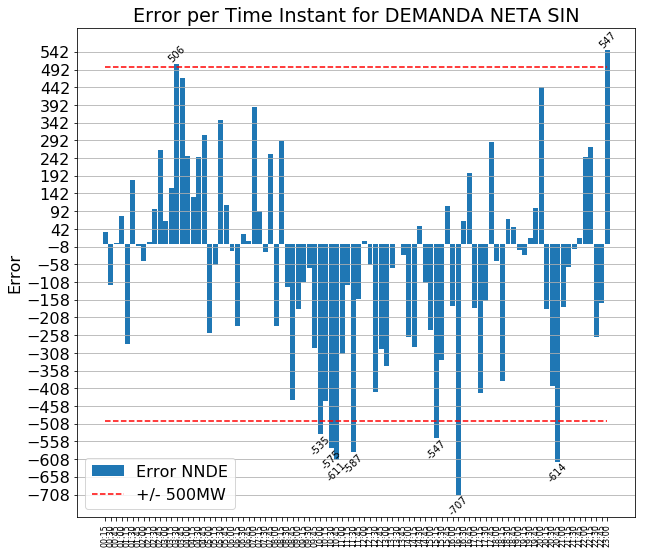

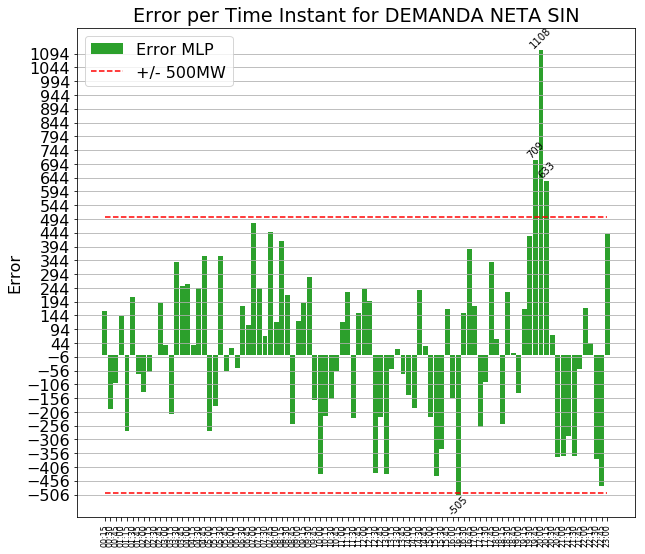

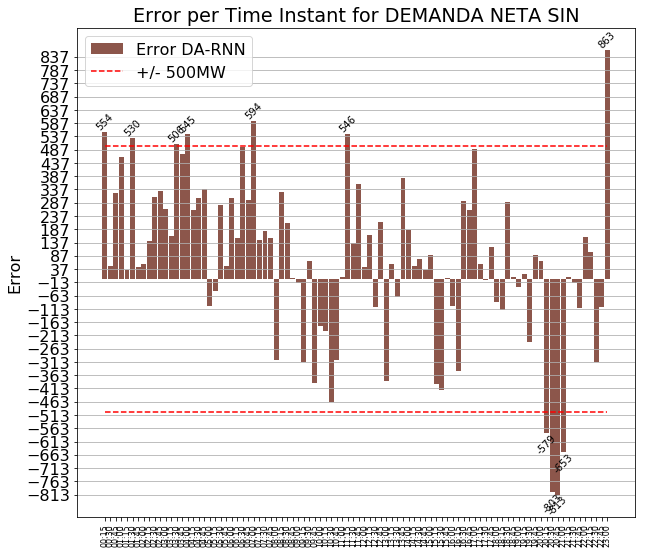

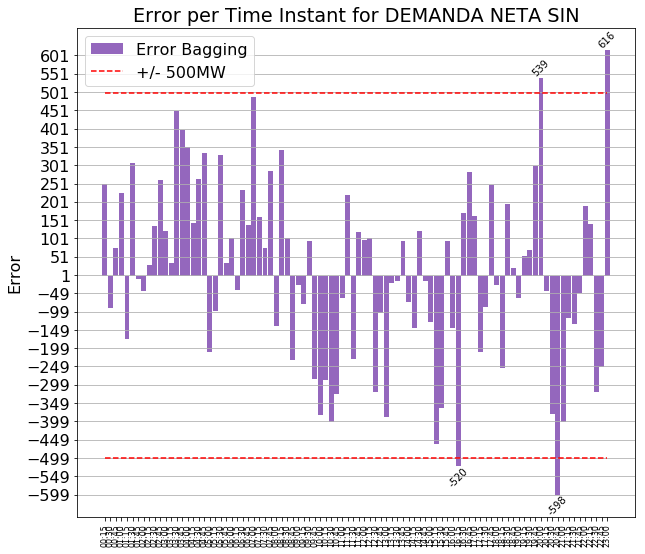

In [32]:
for error, error_legend, e_color in zip ([errors_nnde, errors_mlp, errors_da_rnn, errors_bagging], 
                                         ['NNDE', 'MLP', 'DA-RNN', 'Bagging'],
                                         ['C0', 'C2', 'C5', 'C4']):
    w = 0.9
    l = np.arange(92)

    fig = plt.figure()
    ax = fig.add_subplot(111)

    rects3 = ax.bar(l, error, width=w, color=e_color)

    qmw = ax.plot(l, [500] * 92, color='red', linestyle='--')
    mqmw = ax.plot(l, [-500] * 92, color='red', linestyle='--')

    ax.set_ylabel('Error')    
    max_top = np.max(error)
    min_bot = np.min(error)

    plt.title('Error per Time Instant for DEMANDA NETA SIN')
    x = np.arange(92)
    plt.xticks(x, dates_series, rotation = 'vertical', fontsize = 8)
    plt.yticks(np.arange(min_bot, max_top, 50))
    ax.legend((rects3[0], qmw[0]), ('Error {}'.format(error_legend), '+/- 500MW'))
    # ax.legend((qmw[0], mqmw[0]), ('500MW', '-500MW'))
    plt.grid(which='major', axis='y')
    autolabel(rects3)
    plt.savefig('/Users/rafa/Dropbox/My papers/Tesis/figures/chapter7/barplot_errors_comparison_demanda_neta_sin_{}.eps'.format(error_legend), dpi=300)
    plt.show()